In [1]:
import os
import time
import sys
sys.path.append('./BASS/')
sys.path.append('./Utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from GMM import GMM_model

In [2]:
pathData = './Data/'
DataName = 'phtaxis'
condition = [0,1]  # Append to the list in order to see GMM outputs on more datasets at once

pathGMM = './GMM/'
GMMName = 'acid_new'

In [3]:
datasets = []

for n in condition:
    datasets.append(np.load(pathData + DataName + "_dataset_condition{}.npy".format(n)))


means_ = np.load(pathGMM + GMMName + '_means.npy')
covars_ = np.load(pathGMM + GMMName + '_covars.npy')
weights_ = np.load(pathGMM + GMMName + '_weights.npy')

model_fit = GMM_model(means_.shape[0])
model_fit._read_params(means_,covars_,weights_)

In [4]:
print(means_.shape)
print(means_)

(7, 6)
[[ 35.06973351  15.55036115   3.52214988  37.09167798  22.10470188
   14.79864493]
 [ 93.19094478  21.81070089   5.72265737 118.24712714 -26.17354271
   34.78770188]
 [ 37.65926121   9.47778666   1.99975486  52.75466247  23.41822932
   -1.96153484]
 [ 71.71522419  12.7756838    3.49438689 144.87764276 -26.39890435
  -10.27840355]
 [ 16.69806854   8.57701401   2.32989563  -9.26404307  13.2825717
   10.79242055]
 [  2.80854737   4.81681163   0.68867686 -37.46061904  -5.38957289
   -4.77076089]
 [  8.8701902    8.41677136   1.40731593 -22.7664316   -4.421429
    4.21061403]]


In [5]:
# Predict the classes assigned to each state in each dataset
states = []

for i,data in enumerate(datasets):
    states.append(np.argmax(model_fit._compute_posterior(data,i),axis=0))

In [6]:
# Perform PCA for visualization if needed
X = np.vstack(datasets)
pca = PCA(n_components=2)
Y = pca.fit_transform(X)

In [7]:
# Visualize clusters in a 2D space
# V = np.vstack(datasets) # Set V = Y in order to use the PCA output
V = Y
clusters = np.hstack(states)

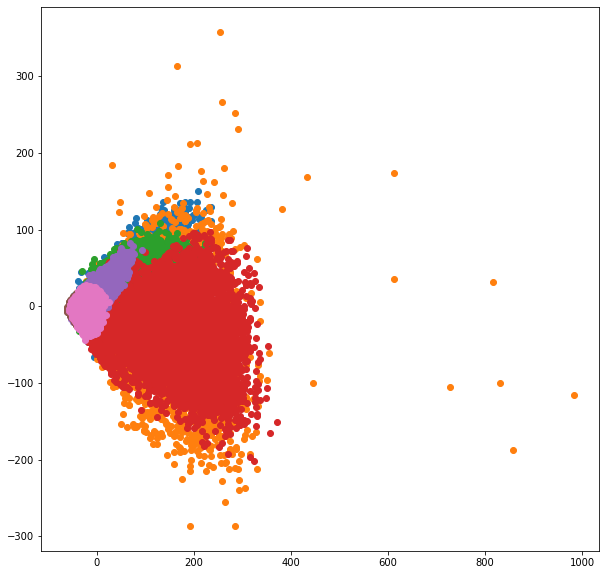

In [8]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

for c in range(means_.shape[0]):
    idx = np.asarray(np.where(clusters == c)[0])
    ax.scatter(V[idx,0],V[idx,1],color = 'C%d'%c)

16.348932674474085 36.97557674664568 [0.0283514  0.06398339]
22.461712050917466 96.42078939298032 [0.01258931 0.02439856]
9.561911657606993 38.30326114859228 [0.15822972 0.12963911]
13.159925174847647 74.2769027184348 [0.0674936  0.07519108]
9.21552966014567 18.06300195744114 [0.09002564 0.1122557 ]
4.881529336940952 2.7717739667163133 [0.47226741 0.40275299]
8.373130040177564 9.971226961386273 [0.17104291 0.19177918]


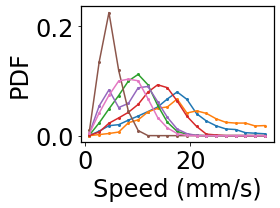

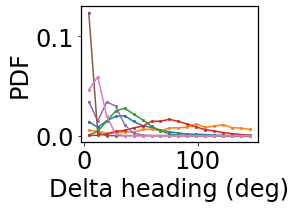

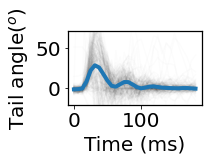

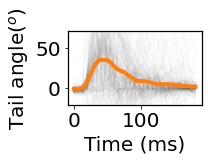

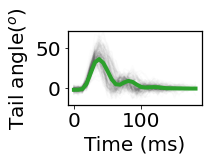

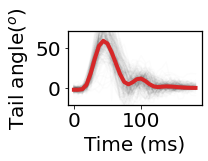

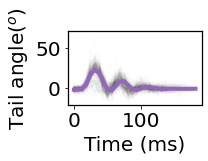

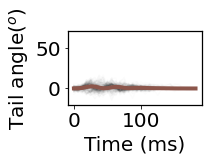

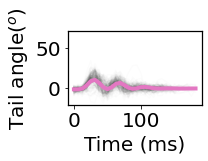

In [9]:
## For phtaxis dataset, or datasets with tailangles available in the form datasetname_tailangles_conditionx.npy,
## use the following to visualize and save bout types found by clustering

tail_angles = []
tapath = pathData + DataName+ "_tailangles_"

for n in condition:
    tail_angles.append(np.load(tapath + "condition{}.npy".format(n)))

Condition = 0  #Specific condition to check bout types and kinematics
    
speeds = []
deltaheads = []
tails = []

ta = tail_angles[Condition]
data = datasets[Condition]
n_cluster = len(model_fit.means_)

for i in range(n_cluster):
    speeds += [[]]
    deltaheads += [[]]
    tails += [[]]

states = np.argmax(model_fit._compute_posterior(data,Condition),axis=0)
for i,state in enumerate(states):
    speeds[state] += [data[i,1]]
    deltaheads[state] +=  [data[i,0]]
    tails[state] += [ta[i,:,0]]

fig1,axis1= plt.subplots(1,1,figsize = (4,3))
fig2,axis2= plt.subplots(1,1,figsize = (4,3))

for state in np.arange(n_cluster):

    n,bins = np.histogram(speeds[state], bins = np.linspace(0,35,20), density = True)
    bins = 0.5*(bins[1:] + bins[:-1])
    axis1.plot(bins, n,'C%do-'%state, ms = 2)

    n,bins = np.histogram(deltaheads[state], bins = np.linspace(0,150,20), density = True)
    bins = 0.5*(bins[1:] + bins[:-1])
    axis2.plot(bins, n,'C%do-'%state, ms = 2)

    fg,ax=plt.subplots(1,1,figsize = (3,2))
    arr = np.array(tails[state])
    arrs_fil0 = arr[np.mean(arr,axis=1) > 0]
    arrs_fil1 = arr[np.mean(arr,axis=1) < 0]

    for num in range(200):
        ax.plot(np.arange(len(arrs_fil0[num]))*1e3/160.,arrs_fil0[num],'k-',alpha = 0.01)
    ax.plot(np.arange(len(arrs_fil0[0]))*1e3/160.,np.mean(arrs_fil0,axis=0),'C%d'%state,lw = 4)

    ax.set_ylim(-20,70)
    ax.tick_params(labelsize = 20)
    ax.spines['top'].set_linewidth(1.25)
    ax.spines['left'].set_linewidth(1.25)
    ax.spines['bottom'].set_linewidth(1.25)
    ax.spines['right'].set_linewidth(1.25)
    ax.set_xlabel("Time (ms)", fontsize = 20)
    ax.set_ylabel(r"Tail angle($^o$)", fontsize = 20)
    fg.tight_layout()
    fg.savefig(pathGMM + GMMName +"_figure_tailangles_clusters_tailanglespca_kin_{}_condition{}.png".format(state,Condition))
    print(np.mean(speeds[state]),np.mean(deltaheads[state]), model_fit.weights_[:,state])

axis1.tick_params(labelsize = 24)
axis1.spines['top'].set_linewidth(1.25)
axis1.spines['left'].set_linewidth(1.25)
axis1.spines['bottom'].set_linewidth(1.25)
axis1.spines['right'].set_linewidth(1.25)
axis1.set_xlabel("Speed (mm/s)",fontsize = 24)
axis1.set_ylabel("PDF",fontsize = 24)
fig1.tight_layout()

axis2.tick_params(labelsize = 24)
axis2.spines['top'].set_linewidth(1.25)
axis2.spines['left'].set_linewidth(1.25)
axis2.spines['bottom'].set_linewidth(1.25)
axis2.spines['right'].set_linewidth(1.25)
axis2.set_xlabel("Delta heading (deg)",fontsize = 24)
axis2.set_ylabel("PDF",fontsize = 24)
fig2.tight_layout()

fig1.savefig(pathGMM + GMMName  +"_speed_clusters_tailanglesPCA_and_kin_condition{}.png".format(Condition))
fig2.savefig(pathGMM + GMMName  +"_deltahead_clusters_tailanglesPCA_and_kin_condition{}.png".format(Condition))